# Calculation of back allocation using machine learning

## Importing necessary libraries

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.subplots as sp
import plotly.graph_objects as go
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [71]:
df_well1 = pd.read_excel(r'C:\Users\aliyu\Documents\Machine Learning\Work\back-allocation-using-machine-learning\datasets\well1.xlsx', sheet_name='Full History', header=2)
df_well2 = pd.read_excel(r'C:\Users\aliyu\Documents\Machine Learning\Work\back-allocation-using-machine-learning\datasets\well2.xlsx', sheet_name='Full History', header=2)
df_well3 = pd.read_excel(r'C:\Users\aliyu\Documents\Machine Learning\Work\back-allocation-using-machine-learning\datasets\well3.xlsx', sheet_name='Full History', header=2)
df_well4 = pd.read_excel(r'C:\Users\aliyu\Documents\Machine Learning\Work\back-allocation-using-machine-learning\datasets\well4.xlsx', sheet_name='Full History', header=2)


In [72]:
df_well1.head()

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1999-01-18 00:00:00,1999-01-19,44.0,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-02-05 00:00:00,1999-01-20,50.0,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-02-06 00:00:00,1999-01-21,55.0,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-08 00:00:00,1999-01-22,55.0,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-02-09 00:00:00,1999-01-25,55.0,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#selecting columns with proper names only
df_well1 = df_well1[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well2 = df_well2[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well3 = df_well3[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well4 = df_well4[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well1.head()

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR,API
0,1999-01-18 00:00:00,1999-01-19,44.0,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,6936.0,936.158726,NaN
1,1999-02-05 00:00:00,1999-01-20,50.0,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871,NaN
2,1999-02-06 00:00:00,1999-01-21,55.0,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265,NaN
3,1999-02-08 00:00:00,1999-01-22,55.0,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470,NaN
4,1999-02-09 00:00:00,1999-01-25,55.0,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604,NaN


## Data cleaning and EDA

### Well 1

In [74]:
df_well1.shape

(191, 13)

In [75]:
df_well1.isnull().sum()

Ir. Calender           0
Eng. Calender         13
Choke(/64")           96
WHT (0C)              22
WHP (psig)             0
WHP (barg)             0
Oil Rate (STBD)        0
∆Q (STBD)              1
Water Rate(sbwpd)      5
BS&W                   0
Gas Rate (mscfd)       6
GOR                    1
API                  176
dtype: int64

In [76]:
## since API has null values more than 50% of data we can drop these columns
df_well1 = df_well1.drop(['API' ], axis=1)

In [77]:
df_well1

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-18 00:00:00,1999-01-19,44.0,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-02-05 00:00:00,1999-01-20,50.0,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-02-06 00:00:00,1999-01-21,55.0,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-02-08 00:00:00,1999-01-22,55.0,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-02-09 00:00:00,1999-01-25,55.0,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1388/08/24,NaT,NaN,87.3,1858.90,128.200000,4793.0,313.0,0.00,0.000000,5925.0,1236.177759
187,1388/09/25,NaT,NaN,87.0,1812.50,125.000000,4825.0,32.0,0.00,0.000000,6013.0,1246.217617
188,1388/11/15,NaT,NaN,86.0,1777.70,122.600000,4580.0,-245.0,5.00,0.100000,5716.0,1248.034934
189,1388/12/29,NaT,NaN,87.0,1767.55,121.900000,4825.0,245.0,5.00,0.100000,6205.0,1286.010363


In [78]:
#drop unnecessary colunms
df_well1 = df_well1.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [79]:
df_well1.head()

,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,44.0,76.4,1785.58,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-01-20,50.0,NaN,1683.38,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,55.0,NaN,1566.58,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,55.0,NaN,1576.80,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,55.0,NaN,1575.34,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604


In [80]:
#select the data until Eng. Calendar is not null
df_well1 = df_well1[df_well1['Eng. Calender'].notnull()]
df_well1

,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,44.0,76.4,1785.58,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-01-20,50.0,NaN,1683.38,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,55.0,NaN,1566.58,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,55.0,NaN,1576.80,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,55.0,NaN,1575.34,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604
...,...,...,...,...,...,...,...,...,...,...
173,2005-12-09,NaN,85.0,1941.55,4086.0,-2.0,2.00,0.050000,5583.0,1366.372981
174,2006-01-09,NaN,85.0,1953.15,4107.0,21.0,NaN,0.100000,NaN,1178.600000
175,2006-02-06,NaN,85.0,1902.40,4203.0,96.0,NaN,0.100000,NaN,1120.000000
176,2006-03-07,NaN,85.0,1918.35,4155.0,-48.0,NaN,0.100000,NaN,1317.000000


In [81]:
df_well1.isnull().sum()

Eng. Calender         0
Choke(/64")          83
WHT (0C)             22
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             1
Water Rate(sbwpd)     4
BS&W                  0
Gas Rate (mscfd)      5
GOR                   1
dtype: int64

In [82]:
fig = sp.make_subplots(rows=1, cols=5, subplot_titles=('WHT (0C)', '∆Q (STBD)', 'Water Rate(sbwpd)', 'Gas Rate (mscfd)', 'GOR'))

trace1 = go.Histogram(x=df_well1['WHT (0C)'], nbinsx=40, name='WHT (0C)')
trace2 = go.Histogram(x=df_well1['∆Q (STBD)'], nbinsx=40, name='∆Q (STBD)')
trace3 = go.Histogram(x=df_well1['Water Rate(sbwpd)'], nbinsx=40, name='Water Rate(sbwpd)')
trace4 = go.Histogram(x=df_well1['Gas Rate (mscfd)'], nbinsx=40, name='Gas Rate (mscfd)')
trace5 = go.Histogram(x=df_well1['GOR'], nbinsx=40, name='GOR')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.add_trace(trace4, row=1, col=4)
fig.add_trace(trace5, row=1, col=5)

fig.update_layout(height=500, width=1000, title_text="Distribution of Variables")
fig.show()


In [83]:
# fill up the null values with mean for WHT, delta Q, Gas rate, GOR and median for Water Rate
df_well1['WHT (0C)'] = df_well1['WHT (0C)'].fillna(df_well1['WHT (0C)'].mean())
df_well1['∆Q (STBD)'] = df_well1['∆Q (STBD)'].fillna(df_well1['∆Q (STBD)'].mean())
df_well1['Water Rate(sbwpd)'] = df_well1['Water Rate(sbwpd)'].fillna(df_well1['Water Rate(sbwpd)'].median())
df_well1['Gas Rate (mscfd)'] = df_well1['Gas Rate (mscfd)'].fillna(df_well1['Gas Rate (mscfd)'].mean())
df_well1['GOR'] = df_well1['GOR'].fillna(df_well1['GOR'].mean())

In [84]:
df_well1.isnull().sum()


Eng. Calender         0
Choke(/64")          83
WHT (0C)              0
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             0
Water Rate(sbwpd)     0
BS&W                  0
Gas Rate (mscfd)      0
GOR                   0
dtype: int64

In [85]:
#rename all the columns to add _ in between the names and exclude the units
df_well1 = df_well1.rename(columns={'Choke(/64")':'Choke','Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well1 = df_well1.add_suffix('_well_1')
df_well1 = df_well1.rename(columns={'Eng_Calender_well_1':'Eng_Calender'})
df_well1.head()

,Eng_Calender,Choke_well_1,WHT_well_1,WHP_well_1,Oil_Rate_well_1,delta_Q_well_1,Water_Rate_well_1,BS&W_well_1,Gas_Rate_well_1,GOR_well_1
0,1999-01-19,44.0,76.400000,1785.58,7409.0,-15.875706,3.29,0.044386,6936.0,936.158726
1,1999-01-20,50.0,83.657051,1683.38,9205.0,1796.000000,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,55.0,83.657051,1566.58,10454.0,1249.000000,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,55.0,83.657051,1576.80,10006.0,-448.000000,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,55.0,83.657051,1575.34,9877.0,-129.000000,0.00,0.000000,10976.0,1111.268604


In [86]:
# Compute correlation matrix
correlation_matrix = df_well1.corr()

# Get correlations of 'target' with other variables
correlations = correlation_matrix['Oil_Rate_well_1'].sort_values(ascending=False)

# Print the correlations
print(correlations)

Oil_Rate_well_1      1.000000
Choke_well_1         0.911953
Gas_Rate_well_1      0.847613
WHT_well_1           0.573824
delta_Q_well_1       0.185587
Water_Rate_well_1   -0.150540
BS&W_well_1         -0.178875
GOR_well_1          -0.446712
WHP_well_1          -0.911352
Name: Oil_Rate_well_1, dtype: float64


In [87]:
# Create a scatter plot
trace = go.Scatter(x=df_well1['Choke_well_1'], y=df_well1['Oil_Rate_well_1'], mode='markers')

# Create layout
layout = go.Layout(
    title='Scatter plot of Choke Size vs Oil Rate',
    xaxis=dict(title='Choke Size'),
    yaxis=dict(title='Oil Rate'),
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()


### Well 2

In [88]:
df_well2.shape

(233, 13)

In [89]:
df_well2.isnull().sum()

Ir. Calender          44
Eng. Calender         27
Choke(/64")          107
WHT (0C)              19
WHP (psig)             0
WHP (barg)            11
Oil Rate (STBD)       11
∆Q (STBD)             12
Water Rate(sbwpd)     16
BS&W                  11
Gas Rate (mscfd)      17
GOR                   12
API                  219
dtype: int64

In [90]:
## since API has null values more than 50% of data we can drop these columns
df_well2 = df_well2.drop(['API' ], axis=1)

In [91]:
df_well2.head()

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1377/10/29,1999-01-19,60.0,79.0,1378.95,95.1,11092.0,NaN,31.95,0.0,8730.6,787.107825
1,1377/10/30,1999-01-20,64.0,80.0,1326.75,91.5,11784.0,692.0,0.00,0.0,10063.2,853.971487
2,1377/11/1,1999-01-21,64.0,80.0,1338.35,92.3,11637.0,-147.0,0.00,0.0,9968.0,856.578156
3,1377/11/2,1999-01-22,64.0,80.0,1363.00,94.0,11305.0,-332.0,0.00,0.0,9763.2,863.617868
4,1377/11/5,1999-01-25,72.0,80.0,1138.25,78.5,13307.0,2002.0,0.00,0.0,11945.6,897.692944


In [92]:
#drop unnecessary colunms
df_well2 = df_well2.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [93]:
#select the data until Eng. Calendar is not null
df_well2 = df_well2[df_well2['Eng. Calender'].notnull()]
df_well2

,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,60.0,79.0,1378.95,11092.0,NaN,31.95,0.00,8730.6,787.107825
1,1999-01-20,64.0,80.0,1326.75,11784.0,692.0,0.00,0.00,10063.2,853.971487
2,1999-01-21,64.0,80.0,1338.35,11637.0,-147.0,0.00,0.00,9968.0,856.578156
3,1999-01-22,64.0,80.0,1363.00,11305.0,-332.0,0.00,0.00,9763.2,863.617868
4,1999-01-25,72.0,80.0,1138.25,13307.0,2002.0,0.00,0.00,11945.6,897.692944
...,...,...,...,...,...,...,...,...,...,...
201,2008-04-01,NaN,84.4,1758.85,3966.0,6.0,24.00,0.60,4975.0,1254.412506
202,2008-06-01,NaN,84.9,1744.35,3950.0,-16.0,12.00,0.30,5064.0,1282.025316
203,2008-08-02,NaN,85.3,1726.95,3984.0,34.0,6.00,0.15,4275.0,1073.042169
204,2008-09-03,NaN,85.3,1718.25,3954.0,-30.0,24.00,0.60,4290.0,1084.977238


In [94]:
df_well2.isnull().sum()

Eng. Calender         0
Choke(/64")          80
WHT (0C)              8
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             1
Water Rate(sbwpd)     0
BS&W                  0
Gas Rate (mscfd)      1
GOR                   1
dtype: int64

In [95]:
fig = sp.make_subplots(rows=1, cols=5, subplot_titles=('WHT (0C)', '∆Q (STBD)', 'Water Rate(sbwpd)', 'Gas Rate (mscfd)', 'GOR'))

trace1 = go.Histogram(x=df_well2['WHT (0C)'], nbinsx=40, name='WHT (0C)')
trace2 = go.Histogram(x=df_well2['∆Q (STBD)'], nbinsx=40, name='∆Q (STBD)')
trace3 = go.Histogram(x=df_well2['Water Rate(sbwpd)'], nbinsx=40, name='Water Rate(sbwpd)')
trace4 = go.Histogram(x=df_well2['Gas Rate (mscfd)'], nbinsx=40, name='Gas Rate (mscfd)')
trace5 = go.Histogram(x=df_well2['GOR'], nbinsx=40, name='GOR')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.add_trace(trace4, row=1, col=4)
fig.add_trace(trace5, row=1, col=5)

fig.update_layout(height=500, width=1000, title_text="Distribution of Variables")
fig.show()


In [96]:
# fill up the null values with mean for delta Q, Gas rate and median for Water Rate, WHT
df_well2['∆Q (STBD)'] = df_well2['∆Q (STBD)'].fillna(df_well2['∆Q (STBD)'].mean())
df_well2['Gas Rate (mscfd)'] = df_well2['Gas Rate (mscfd)'].fillna(df_well2['Gas Rate (mscfd)'].mean())
df_well2['WHT (0C)'] = df_well2['WHT (0C)'].fillna(df_well2['WHT (0C)'].median())
df_well2['Water Rate(sbwpd)'] = df_well2['Water Rate(sbwpd)'].fillna(df_well2['Water Rate(sbwpd)'].median())
df_well2['GOR'] = df_well2['GOR'].fillna(df_well2['GOR'].mean())


In [97]:
df_well2.isnull().sum()

Eng. Calender         0
Choke(/64")          80
WHT (0C)              0
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             0
Water Rate(sbwpd)     0
BS&W                  0
Gas Rate (mscfd)      0
GOR                   0
dtype: int64

In [98]:
#rename all the columns to add _ in between the names and exclude the units
df_well2 = df_well2.rename(columns={'Choke(/64")':'Choke','Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well2 = df_well2.add_suffix('_well_2')
df_well2 = df_well2.rename(columns={'Eng_Calender_well_2':'Eng_Calender'})
df_well2.head()

,Eng_Calender,Choke_well_2,WHT_well_2,WHP_well_2,Oil_Rate_well_2,delta_Q_well_2,Water_Rate_well_2,BS&W_well_2,Gas_Rate_well_2,GOR_well_2
0,1999-01-19,60.0,79.0,1378.95,11092.0,-34.804878,31.95,0.0,8730.6,787.107825
1,1999-01-20,64.0,80.0,1326.75,11784.0,692.000000,0.00,0.0,10063.2,853.971487
2,1999-01-21,64.0,80.0,1338.35,11637.0,-147.000000,0.00,0.0,9968.0,856.578156
3,1999-01-22,64.0,80.0,1363.00,11305.0,-332.000000,0.00,0.0,9763.2,863.617868
4,1999-01-25,72.0,80.0,1138.25,13307.0,2002.000000,0.00,0.0,11945.6,897.692944


In [99]:
# Compute correlation matrix
correlation_matrix = df_well2.corr()

# Get correlations of 'target' with other variables
correlations = correlation_matrix['Oil_Rate_well_2'].sort_values(ascending=False)

# Print the correlations
print(correlations)

Oil_Rate_well_2      1.000000
Choke_well_2         0.957491
Gas_Rate_well_2      0.849847
WHT_well_2           0.771505
delta_Q_well_2       0.148756
Water_Rate_well_2   -0.023633
BS&W_well_2         -0.166428
GOR_well_2          -0.754890
WHP_well_2          -0.962139
Name: Oil_Rate_well_2, dtype: float64


In [100]:
# Create a scatter plot
trace = go.Scatter(x=df_well2['Choke_well_2'], y=df_well2['Oil_Rate_well_2'], mode='markers')

# Create layout
layout = go.Layout(
    title='Scatter plot of Choke Size vs Oil Rate',
    xaxis=dict(title='Choke Size'),
    yaxis=dict(title='Oil Rate'),
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()


### Well 3

In [101]:
df_well3.shape

(217, 13)

In [102]:
df_well3.isnull().sum()

Ir. Calender          47
Eng. Calender         39
Choke(/64")          109
WHT (0C)              28
WHP (psig)             0
WHP (barg)            18
Oil Rate (STBD)       18
∆Q (STBD)              1
Water Rate(sbwpd)     27
BS&W                  22
Gas Rate (mscfd)      23
GOR                   18
API                  217
dtype: int64

In [103]:
## since API has null values more than 50% of data we can drop these columns
df_well3 = df_well3.drop(['API' ], axis=1)

In [104]:
#drop unnecessary colunms
df_well3 = df_well3.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [105]:
#select the data until Eng. Calendar is not null
df_well3 = df_well3[df_well3['Eng. Calender'].notnull()]
df_well3

,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,44.0,74.6,1541.35,7888.0,NaN,8.96,0.113967,5892.0,746.957404
1,1999-01-20,52.0,80.0,1442.75,8933.0,1045.0,0.00,0.000000,7174.2,803.112056
2,1999-01-21,52.0,80.0,1339.80,9558.0,625.0,0.00,0.000000,7778.4,813.810421
3,1999-01-22,52.0,80.0,1370.25,8896.0,-662.0,0.00,0.000000,7457.6,838.309353
4,1999-01-25,52.0,80.0,1377.50,8725.0,-171.0,0.00,0.000000,7348.8,842.269341
...,...,...,...,...,...,...,...,...,...,...
173,2005-12-09,NaN,84.3,1173.05,3095.0,4.0,422.00,12.000000,3757.0,1213.893376
174,2006-01-09,NaN,84.4,1168.70,3142.0,47.0,388.00,11.000000,3970.0,1178.600000
175,2006-02-06,NaN,84.2,1171.60,3156.0,14.0,390.00,11.000000,3896.5,1120.000000
176,2006-03-07,NaN,NaN,1170.15,3108.0,-48.0,464.50,13.000000,3676.0,1317.000000


In [106]:
df_well3.isnull().sum()

Eng. Calender         0
Choke(/64")          70
WHT (0C)              9
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             1
Water Rate(sbwpd)     4
BS&W                  4
Gas Rate (mscfd)      0
GOR                   0
dtype: int64

In [107]:
fig = sp.make_subplots(rows=1, cols=5, subplot_titles=('WHT (0C)', '∆Q (STBD)', 'Water Rate(sbwpd)', 'Gas Rate (mscfd)', 'GOR'))

trace1 = go.Histogram(x=df_well3['WHT (0C)'], nbinsx=40, name='WHT (0C)')
trace2 = go.Histogram(x=df_well3['∆Q (STBD)'], nbinsx=40, name='∆Q (STBD)')
trace3 = go.Histogram(x=df_well3['Water Rate(sbwpd)'], nbinsx=40, name='Water Rate(sbwpd)')
trace4 = go.Histogram(x=df_well3['Gas Rate (mscfd)'], nbinsx=40, name='Gas Rate (mscfd)')
trace5 = go.Histogram(x=df_well3['GOR'], nbinsx=40, name='GOR')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.add_trace(trace4, row=1, col=4)
fig.add_trace(trace5, row=1, col=5)

fig.update_layout(height=500, width=1000, title_text="Distribution of Variables")
fig.show()


In [108]:
# fill up the null values with mean for WHT, delta Q  and median for Water Rate, BS&W
df_well3['∆Q (STBD)'] = df_well3['∆Q (STBD)'].fillna(df_well3['∆Q (STBD)'].mean())
df_well3['WHT (0C)'] = df_well3['WHT (0C)'].fillna(df_well3['WHT (0C)'].mean())
df_well3['Water Rate(sbwpd)'] = df_well3['Water Rate(sbwpd)'].fillna(df_well3['Water Rate(sbwpd)'].median())
df_well3['BS&W'] = df_well3['BS&W'].fillna(df_well3['BS&W'].median())

In [109]:
df_well3.isnull().sum()

Eng. Calender         0
Choke(/64")          70
WHT (0C)              0
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             0
Water Rate(sbwpd)     0
BS&W                  0
Gas Rate (mscfd)      0
GOR                   0
dtype: int64

In [110]:
#rename all the columns to add _ in between the names and exclude the units
df_well3 = df_well3.rename(columns={'Choke(/64")':'Choke','Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well3 = df_well3.add_suffix('_well_3')
df_well3 = df_well3.rename(columns={'Eng_Calender_well_3':'Eng_Calender'})
df_well3.head()

,Eng_Calender,Choke_well_3,WHT_well_3,WHP_well_3,Oil_Rate_well_3,delta_Q_well_3,Water_Rate_well_3,BS&W_well_3,Gas_Rate_well_3,GOR_well_3
0,1999-01-19,44.0,74.6,1541.35,7888.0,-27.112994,8.96,0.113967,5892.0,746.957404
1,1999-01-20,52.0,80.0,1442.75,8933.0,1045.000000,0.00,0.000000,7174.2,803.112056
2,1999-01-21,52.0,80.0,1339.80,9558.0,625.000000,0.00,0.000000,7778.4,813.810421
3,1999-01-22,52.0,80.0,1370.25,8896.0,-662.000000,0.00,0.000000,7457.6,838.309353
4,1999-01-25,52.0,80.0,1377.50,8725.0,-171.000000,0.00,0.000000,7348.8,842.269341


In [111]:
# Create a scatter plot
trace = go.Scatter(x=df_well3['Choke_well_3'], y=df_well3['Oil_Rate_well_3'], mode='markers')

# Create layout
layout = go.Layout(
    title='Scatter plot of Choke Size vs Oil Rate',
    xaxis=dict(title='Choke Size'),
    yaxis=dict(title='Oil Rate'),
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()


In [112]:
# Compute correlation matrix
correlation_matrix = df_well3.corr()

# Get correlations of 'target' with other variables
correlations = correlation_matrix['Oil_Rate_well_3'].sort_values(ascending=False)

# Print the correlations
print(correlations)

Oil_Rate_well_3      1.000000
Choke_well_3         0.872398
Gas_Rate_well_3      0.825669
WHT_well_3           0.474539
delta_Q_well_3       0.208847
Water_Rate_well_3   -0.261633
BS&W_well_3         -0.266641
GOR_well_3          -0.472392
WHP_well_3          -0.516923
Name: Oil_Rate_well_3, dtype: float64


### Well 4

In [113]:
df_well4.shape

(187, 13)

In [114]:
df_well4.isnull().sum()

Ir. Calender          42
Eng. Calender          9
Choke(/64")           99
WHT (0C)              37
WHP (psig)             0
WHP (barg)            10
Oil Rate (STBD)        9
∆Q (STBD)              1
Water Rate(sbwpd)     13
BS&W                   9
Gas Rate (mscfd)      13
GOR                    9
API                  187
dtype: int64

In [115]:
## since API has null values more than 50% of data we can drop these columns
df_well4 = df_well4.drop(['API' ], axis=1)

In [116]:
#drop unnecessary colunms
df_well4 = df_well4.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [117]:
#select the data until Eng. Calendar is not null
df_well4 = df_well4[df_well4['Eng. Calender'].notnull()]
df_well4

,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,62.0,NaN,1286.15,10874.0,NaN,0.0,0.0,9600.0,882.839801
1,1999-01-20,62.0,80.0,1316.60,10280.0,-594.0,0.0,0.0,9200.0,894.941634
2,1999-01-21,62.0,80.0,1307.90,10243.0,-37.0,0.0,0.0,9200.0,898.174363
3,1999-01-22,62.0,80.0,1296.30,10209.0,-34.0,0.0,0.0,9120.0,893.329415
4,1999-01-25,50.0,NaN,1595.00,9524.0,-685.0,0.0,0.0,8119.2,852.498950
...,...,...,...,...,...,...,...,...,...,...
173,2005-12-09,NaN,84.0,1521.05,2974.0,24.0,609.0,17.0,6672.0,2243.443174
174,2006-01-09,NaN,84.0,1506.55,3131.0,157.0,641.0,17.0,7362.0,2351.325455
175,2006-02-06,NaN,85.0,1476.10,2934.0,-197.0,733.0,20.0,7293.0,2485.685072
176,2006-03-07,NaN,84.0,1458.70,3083.0,149.0,819.0,21.0,7081.0,2296.788842


In [118]:
df_well4.isnull().sum()

Eng. Calender         0
Choke(/64")          90
WHT (0C)             28
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             1
Water Rate(sbwpd)     4
BS&W                  0
Gas Rate (mscfd)      4
GOR                   0
dtype: int64

In [119]:
fig = sp.make_subplots(rows=1, cols=5, subplot_titles=('WHT (0C)', '∆Q (STBD)', 'Water Rate(sbwpd)', 'Gas Rate (mscfd)', 'GOR'))

trace1 = go.Histogram(x=df_well4['WHT (0C)'], nbinsx=40, name='WHT (0C)')
trace2 = go.Histogram(x=df_well4['∆Q (STBD)'], nbinsx=40, name='∆Q (STBD)')
trace3 = go.Histogram(x=df_well4['Water Rate(sbwpd)'], nbinsx=40, name='Water Rate(sbwpd)')
trace4 = go.Histogram(x=df_well4['Gas Rate (mscfd)'], nbinsx=40, name='Gas Rate (mscfd)')
trace5 = go.Histogram(x=df_well4['GOR'], nbinsx=40, name='GOR')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.add_trace(trace4, row=1, col=4)
fig.add_trace(trace5, row=1, col=5)

fig.update_layout(height=500, width=1000, title_text="Distribution of Variables")
fig.show()


In [120]:
# fill up the null values with mean for WHT, delta Q  and median for Water Rate, Gas Rate (mscfd)
df_well4['∆Q (STBD)'] = df_well4['∆Q (STBD)'].fillna(df_well4['∆Q (STBD)'].mean())
df_well4['WHT (0C)'] = df_well4['WHT (0C)'].fillna(df_well4['WHT (0C)'].mean())
df_well4['Water Rate(sbwpd)'] = df_well4['Water Rate(sbwpd)'].fillna(df_well4['Water Rate(sbwpd)'].median())
df_well4['Gas Rate (mscfd)'] = df_well4['Gas Rate (mscfd)'].fillna(df_well4['Gas Rate (mscfd)'].median())

In [121]:
df_well4.isnull().sum()

Eng. Calender         0
Choke(/64")          90
WHT (0C)              0
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             0
Water Rate(sbwpd)     0
BS&W                  0
Gas Rate (mscfd)      0
GOR                   0
dtype: int64

In [122]:
#rename all the columns to add _ in between the names and exclude the units
df_well4 = df_well4.rename(columns={'Choke(/64")':'Choke','Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well4 = df_well4.add_suffix('_well_4')
df_well4 = df_well4.rename(columns={'Eng_Calender_well_4':'Eng_Calender'})
df_well4.head()

,Eng_Calender,Choke_well_4,WHT_well_4,WHP_well_4,Oil_Rate_well_4,delta_Q_well_4,Water_Rate_well_4,BS&W_well_4,Gas_Rate_well_4,GOR_well_4
0,1999-01-19,62.0,80.450667,1286.15,10874.0,-43.344633,0.0,0.0,9600.0,882.839801
1,1999-01-20,62.0,80.000000,1316.60,10280.0,-594.000000,0.0,0.0,9200.0,894.941634
2,1999-01-21,62.0,80.000000,1307.90,10243.0,-37.000000,0.0,0.0,9200.0,898.174363
3,1999-01-22,62.0,80.000000,1296.30,10209.0,-34.000000,0.0,0.0,9120.0,893.329415
4,1999-01-25,50.0,80.450667,1595.00,9524.0,-685.000000,0.0,0.0,8119.2,852.498950


In [123]:
#merge df_well1, df_well2, df_well3, df_well4 based on Eng_Calender column to create a single dataframe
df = pd.merge(df_well1, df_well2, on='Eng_Calender')
df = pd.merge(df, df_well3, on='Eng_Calender')
df = pd.merge(df, df_well4, on='Eng_Calender')
df.head()

,Eng_Calender,Choke_well_1,WHT_well_1,WHP_well_1,Oil_Rate_well_1,delta_Q_well_1,Water_Rate_well_1,BS&W_well_1,Gas_Rate_well_1,GOR_well_1,...,GOR_well_3,Choke_well_4,WHT_well_4,WHP_well_4,Oil_Rate_well_4,delta_Q_well_4,Water_Rate_well_4,BS&W_well_4,Gas_Rate_well_4,GOR_well_4
0,1999-01-19,44.0,76.400000,1785.58,7409.0,-15.875706,3.29,0.044386,6936.0,936.158726,...,746.957404,62.0,80.450667,1286.15,10874.0,-43.344633,0.0,0.0,9600.0,882.839801
1,1999-01-20,50.0,83.657051,1683.38,9205.0,1796.000000,0.00,0.000000,9420.0,1023.356871,...,803.112056,62.0,80.000000,1316.60,10280.0,-594.000000,0.0,0.0,9200.0,894.941634
2,1999-01-21,55.0,83.657051,1566.58,10454.0,1249.000000,0.00,0.000000,10812.0,1034.245265,...,813.810421,62.0,80.000000,1307.90,10243.0,-37.000000,0.0,0.0,9200.0,898.174363
3,1999-01-22,55.0,83.657051,1576.80,10006.0,-448.000000,0.00,0.000000,10832.0,1082.550470,...,838.309353,62.0,80.000000,1296.30,10209.0,-34.000000,0.0,0.0,9120.0,893.329415
4,1999-01-25,55.0,83.657051,1575.34,9877.0,-129.000000,0.00,0.000000,10976.0,1111.268604,...,842.269341,50.0,80.450667,1595.00,9524.0,-685.000000,0.0,0.0,8119.2,852.498950


In [124]:
# Compute correlation matrix
correlation_matrix = df_well4.corr()

# Get correlations of 'target' with other variables
correlations = correlation_matrix['Oil_Rate_well_4'].sort_values(ascending=False)

# Print the correlations
print(correlations)

Oil_Rate_well_4      1.000000
Choke_well_4         0.814185
Gas_Rate_well_4      0.555761
WHT_well_4           0.284133
delta_Q_well_4       0.105556
Water_Rate_well_4   -0.482670
WHP_well_4          -0.580371
BS&W_well_4         -0.585955
GOR_well_4          -0.840900
Name: Oil_Rate_well_4, dtype: float64


In [125]:
#create a new column named 'total_oil_rate' which is the sum of oil rate of all the wells
df['total_oil_rate'] = df['Oil_Rate_well_1'] + df['Oil_Rate_well_2'] + df['Oil_Rate_well_3'] + df['Oil_Rate_well_4']

In [126]:
df.head()

,Eng_Calender,Choke_well_1,WHT_well_1,WHP_well_1,Oil_Rate_well_1,delta_Q_well_1,Water_Rate_well_1,BS&W_well_1,Gas_Rate_well_1,GOR_well_1,...,Choke_well_4,WHT_well_4,WHP_well_4,Oil_Rate_well_4,delta_Q_well_4,Water_Rate_well_4,BS&W_well_4,Gas_Rate_well_4,GOR_well_4,total_oil_rate
0,1999-01-19,44.0,76.400000,1785.58,7409.0,-15.875706,3.29,0.044386,6936.0,936.158726,...,62.0,80.450667,1286.15,10874.0,-43.344633,0.0,0.0,9600.0,882.839801,37263.0
1,1999-01-20,50.0,83.657051,1683.38,9205.0,1796.000000,0.00,0.000000,9420.0,1023.356871,...,62.0,80.000000,1316.60,10280.0,-594.000000,0.0,0.0,9200.0,894.941634,40202.0
2,1999-01-21,55.0,83.657051,1566.58,10454.0,1249.000000,0.00,0.000000,10812.0,1034.245265,...,62.0,80.000000,1307.90,10243.0,-37.000000,0.0,0.0,9200.0,898.174363,41892.0
3,1999-01-22,55.0,83.657051,1576.80,10006.0,-448.000000,0.00,0.000000,10832.0,1082.550470,...,62.0,80.000000,1296.30,10209.0,-34.000000,0.0,0.0,9120.0,893.329415,40416.0
4,1999-01-25,55.0,83.657051,1575.34,9877.0,-129.000000,0.00,0.000000,10976.0,1111.268604,...,50.0,80.450667,1595.00,9524.0,-685.000000,0.0,0.0,8119.2,852.498950,41433.0


In [127]:
#export the dataframe to csv file
df.to_csv('cleaned_well_data.csv', index=False)

In [128]:
# Create a scatter plot
trace = go.Scatter(x=df_well4['Choke_well_4'], y=df_well4['Oil_Rate_well_4'], mode='markers')

# Create layout
layout = go.Layout(
    title='Scatter plot of Choke Size vs Oil Rate',
    xaxis=dict(title='Choke Size'),
    yaxis=dict(title='Oil Rate'),
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()


Although there are 50% missing values in the choke size column, we will keep this column because there is a strong relationship between the choke size and oil rates.

### Model building 

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Eng_Calender       178 non-null    datetime64[ns]
 1   Choke_well_1       95 non-null     float64       
 2   WHT_well_1         178 non-null    float64       
 3   WHP_well_1         178 non-null    float64       
 4   Oil_Rate_well_1    178 non-null    float64       
 5   delta_Q_well_1     178 non-null    float64       
 6   Water_Rate_well_1  178 non-null    float64       
 7   BS&W_well_1        178 non-null    float64       
 8   Gas_Rate_well_1    178 non-null    float64       
 9   GOR_well_1         178 non-null    float64       
 10  Choke_well_2       126 non-null    float64       
 11  WHT_well_2         178 non-null    float64       
 12  WHP_well_2         178 non-null    float64       
 13  Oil_Rate_well_2    178 non-null    float64       
 14  delta_Q_we

In [130]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    showscale=True,
    colorscale='Viridis'
)

fig.update_layout(
    title='Correlation Matrix',
    width=1500, 
    height=1500,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig.show()


<Axes: xlabel='WHP_well_4', ylabel='Oil_Rate_well_4'>

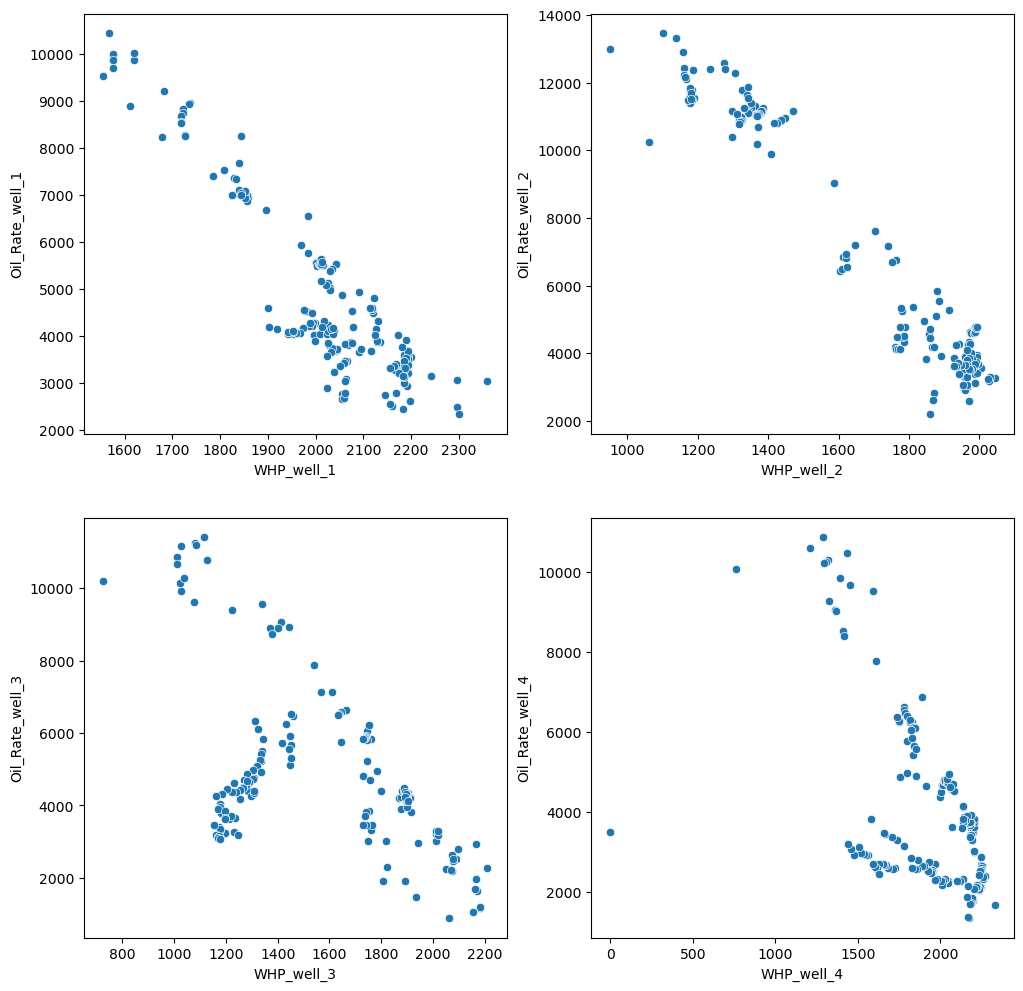

In [131]:
#visulize the correlation between oil rates and WHP for all the wells using scatter plot
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.scatterplot(x='WHP_well_1', y='Oil_Rate_well_1', data=df, ax=ax[0,0])
sns.scatterplot(x='WHP_well_2', y='Oil_Rate_well_2', data=df, ax=ax[0,1])
sns.scatterplot(x='WHP_well_3', y='Oil_Rate_well_3', data=df, ax=ax[1,0])
sns.scatterplot(x='WHP_well_4', y='Oil_Rate_well_4', data=df, ax=ax[1,1])


In [132]:
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Well 1", "Well 2", "Well 3", "Well 4"))

trace1 = go.Scatter(x=df['WHP_well_1'], y=df['Oil_Rate_well_1'], mode='markers', name='Well 1')
trace2 = go.Scatter(x=df['WHP_well_2'], y=df['Oil_Rate_well_2'], mode='markers', name='Well 2')
trace3 = go.Scatter(x=df['WHP_well_3'], y=df['Oil_Rate_well_3'], mode='markers', name='Well 3')
trace4 = go.Scatter(x=df['WHP_well_4'], y=df['Oil_Rate_well_4'], mode='markers', name='Well 4')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=2, col=1)
fig.add_trace(trace4, row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Scatter plot of WHP vs Oil Rate for all wells")
fig.show()


In [133]:
#create x and y arrays in which x has independent variables and y has Oil_Rate for all wells
x = df[['WHP_well_1', 'WHP_well_2', 'WHP_well_3', 'WHP_well_4']]
y = df[['Oil_Rate_well_1', 'Oil_Rate_well_2', 'Oil_Rate_well_3', 'Oil_Rate_well_4']]

In [134]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

#### Random Forest regressor

In [135]:
# Fill missing values with mean column values in the train set
x_train_rf = x_train.fillna(x_train.mean())
# Fill missing values with mean column values in the test set
x_test_rf = x_test.fillna(x_train.mean())  # use mean from the train set to avoid data leakage

# model building using RandomForest regressor
rf = RandomForestRegressor()
# create the multi-output regressor
model = MultiOutputRegressor(rf)

# fit the model to the data
model.fit(x_train_rf, y_train)

# evaluate the model
y_pred = model.predict(x_test_rf)

r2_well1_rf = r2_score(y_test['Oil_Rate_well_1'], y_pred[:, 0])
r2_well2_rf = r2_score(y_test['Oil_Rate_well_2'], y_pred[:, 1])
r2_well3_rf = r2_score(y_test['Oil_Rate_well_3'], y_pred[:, 2])
r2_well4_rf = r2_score(y_test['Oil_Rate_well_4'], y_pred[:, 3])

print(f"R2 Score for Well 1 Oil rate: {r2_well1_rf}")
print(f"R2 Score for Well 2 Oil rate: {r2_well2_rf}")
print(f"R2 Score for Well 3 Oil rate: {r2_well3_rf}")
print(f"R2 Score for Well 4 Oil rate: {r2_well4_rf}")

R2 Score for Well 1 Oil rate: 0.9711652030630201
R2 Score for Well 2 Oil rate: 0.9744294165714319
R2 Score for Well 3 Oil rate: 0.9370929737704868
R2 Score for Well 4 Oil rate: 0.9126342313703856


#### XGBoost regressor

In [136]:
#model building using xgboost regressor
xgb = XGBRegressor()
# create the multi-output regressor
model = MultiOutputRegressor(xgb)
# fit the model to the data
model.fit(x_train, y_train)
#evaluate the model
y_pred = model.predict(x_test)
#evaluation for all wells 
r2_well1_xgb = r2_score(y_test['Oil_Rate_well_1'], y_pred[:, 0])
r2_well2_xgb = r2_score(y_test['Oil_Rate_well_2'], y_pred[:, 1])
r2_well3_xgb = r2_score(y_test['Oil_Rate_well_3'], y_pred[:, 2])
r2_well4_xgb = r2_score(y_test['Oil_Rate_well_4'], y_pred[:, 3])

print(f"R2 Score for Well 1 Oil rate: {r2_well1_xgb}")
print(f"R2 Score for Well 2 Oil rate: {r2_well2_xgb}")
print(f"R2 Score for Well 3 Oil rate: {r2_well3_xgb}")
print(f"R2 Score for Well 4 Oil rate: {r2_well4_xgb}")

R2 Score for Well 1 Oil rate: 0.9670891194898724
R2 Score for Well 2 Oil rate: 0.9740342778887588
R2 Score for Well 3 Oil rate: 0.9259803490314873
R2 Score for Well 4 Oil rate: 0.8706910416279905


#### LightGBM regressor

In [137]:
# model building using LightGBM regressor
lgbm = LGBMRegressor()
# create the multi-output regressor
model = MultiOutputRegressor(lgbm)

# fit the model to the data
model.fit(x_train, y_train)

# evaluate the model
y_pred = model.predict(x_test)

# evaluation for all wells 
r2_well1_lgbm = r2_score(y_test['Oil_Rate_well_1'], y_pred[:, 0])
r2_well2_lgbm = r2_score(y_test['Oil_Rate_well_2'], y_pred[:, 1])
r2_well3_lgbm = r2_score(y_test['Oil_Rate_well_3'], y_pred[:, 2])
r2_well4_lgbm = r2_score(y_test['Oil_Rate_well_4'], y_pred[:, 3])

print(f"R2 Score for Well 1 Oil rate: {r2_well1_lgbm}")
print(f"R2 Score for Well 2 Oil rate: {r2_well2_lgbm}")
print(f"R2 Score for Well 3 Oil rate: {r2_well3_lgbm}")
print(f"R2 Score for Well 4 Oil rate: {r2_well4_lgbm}")

R2 Score for Well 1 Oil rate: 0.9270647401262258
R2 Score for Well 2 Oil rate: 0.9721438847713614
R2 Score for Well 3 Oil rate: 0.8599036888646336
R2 Score for Well 4 Oil rate: 0.8798398091873848


In [423]:

r2_scores_model1 = [r2_well1_rf, r2_well2_rf, r2_well3_rf, r2_well4_rf]
r2_scores_model2 = [r2_well1_xgb, r2_well2_xgb, r2_well3_xgb, r2_well4_xgb]
r2_scores_model3 = [r2_well1_lgbm, r2_well2_lgbm, r2_well3_lgbm, r2_well4_lgbm]
# Create traces
trace1 = go.Bar(
    x=['Well 1', 'Well 2', 'Well 3', 'Well 4'],
    y=r2_scores_model1,
    name='Random Forest'
)

trace2 = go.Bar(
    x=['Well 1', 'Well 2', 'Well 3', 'Well 4'],
    y=r2_scores_model2,
    name='Xgboost'
)

trace3 = go.Bar(
    x=['Well 1', 'Well 2', 'Well 3', 'Well 4'],
    y=r2_scores_model3,
    name='LightGBM'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title='R2 Scores for Different Models and Wells',
    xaxis=dict(title='Wells'),
    yaxis=dict(title='R2 Score')
)

fig = go.Figure(data=data, layout=layout)

fig.show()


After experimenting different algorithms XGB gave better result. We will implement Hyperparameter tuning to increase the accuracy of model.

In [424]:
# Define the hyperparameters
hyperparameters = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
}

# Initialize the XGBoost regressor
xgb = XGBRegressor()

# Initialize the multi-output regressor
model = MultiOutputRegressor(xgb)

# Set up the grid search
grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring='r2')

# Conduct the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Predict using the model with the best parameters
y_pred = grid_search.predict(x_test)

#evaluation for all wells 
r2_well1_xgb_gscv = r2_score(y_test['Oil_Rate_well_1'], y_pred[:, 0])
r2_well2_xgb_gscv = r2_score(y_test['Oil_Rate_well_2'], y_pred[:, 1])
r2_well3_xgb_gscv = r2_score(y_test['Oil_Rate_well_3'], y_pred[:, 2])
r2_well4_xgb_gscv = r2_score(y_test['Oil_Rate_well_4'], y_pred[:, 3])

print(f"R2 Score for Well 1 Oil rate: {r2_well1_xgb_gscv}")
print(f"R2 Score for Well 2 Oil rate: {r2_well2_xgb_gscv}")
print(f"R2 Score for Well 3 Oil rate: {r2_well3_xgb_gscv}")
print(f"R2 Score for Well 4 Oil rate: {r2_well4_xgb_gscv}")


Best Parameters:  {'estimator__learning_rate': 0.05, 'estimator__max_depth': 3, 'estimator__n_estimators': 500}
R2 Score for Well 1 Oil rate: 0.9602176200903121
R2 Score for Well 2 Oil rate: 0.9854434087247373
R2 Score for Well 3 Oil rate: 0.9671297203174843
R2 Score for Well 4 Oil rate: 0.9643259379453801


#### Visually comparison

In [425]:
# First model R2 scores (before hyperparameter tuning)
r2_scores_xgb = [r2_well1_xgb, r2_well2_xgb, r2_well3_xgb, r2_well4_xgb]

# Second model R2 scores (after hyperparameter tuning)
r2_scores_xgb_gscv = [r2_well1_xgb_gscv, r2_well2_xgb_gscv, r2_well3_xgb_gscv, r2_well4_xgb_gscv]  # Replace these with the actual LGBM R2 scores
# Create traces
trace1 = go.Bar(
    x=['Well 1', 'Well 2', 'Well 3', 'Well 4'],
    y=r2_scores_xgb,
    name='XGB (before hyperparameter tuning)',
    marker_color='rgb(55, 83, 109)'
)

trace2 = go.Bar(
    x=['Well 1', 'Well 2', 'Well 3', 'Well 4'],
    y=r2_scores_xgb_gscv,
    name='XGB (after hyperparameter tuning)',
    marker_color='rgb(26, 118, 255)'
)

data = [trace1, trace2]
layout = go.Layout(
    title='R2 Scores by Well and Hyperparameter Tuning',
    xaxis=dict(title='Wells'),
    yaxis=dict(title='R2 Score'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

fig.show()


# End

water cut, thp,  gor if I use thp
water cut = water/water+oil